# DE Final Project

## 1. DataSet Introduction



### Dataset
Link:

*   WorldCups.csv:
*   WorldCupPlayers.csv:
*   WorldCupMatches.csv:





## 2. Perform data preparation & cleaning

### import library

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset into a data frame using Pandas

In [2]:
#Upload data files into workspace if run with google colab
#Can manually drag the data (WorldCups.csv, WorldCupPlayers.csv, WorldCupMatches.csv) files into workspace's Files folder
from google.colab import files
uploaded = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches.csv
Saving WorldCupPlayers.csv to WorldCupPlayers.csv
Saving WorldCups.csv to WorldCups.csv


In [3]:
#If load from local computer, place the data files at same level with this ipynb file.
df_worldcups = pd.read_csv('WorldCups.csv')
df_players = pd.read_csv('WorldCupPlayers.csv')
df_matches = pd.read_csv('WorldCupMatches.csv')

### Explore the number of rows & columns, ranges of values

In [4]:
df_worldcups.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [5]:
df_players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
df_matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


### Handle missing, incorrect and invalid data

In [7]:
#check and handle missing, invalid data
df_worldcups.isnull().sum()

,0
Year,0
Country,0
Winner,0
Runners-Up,0
Third,0
Fourth,0
GoalsScored,0
QualifiedTeams,0
MatchesPlayed,0
Attendance,0


In [8]:
df_players.isnull().sum()

,0
RoundID,0
MatchID,0
Team Initials,0
Coach Name,0
Line-up,0
Shirt Number,0
Player Name,0
Position,33641
Event,28715



*   There are many players who have Position NULL
*   Event should be NULL in most of case



In [9]:
df_matches.isnull().sum()

,0
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


In [10]:
#count total records of df_matches
df_matches.shape[0]

4572

In [11]:
#count total records of df_matches which year data is null
df_matches['Year'].isnull().sum()

3720

In [12]:
#remove all records of df_matches which  data is null
df_matches.dropna(inplace=True)

In [13]:
#check count total records of df_matches again
df_matches.shape[0]

850

### Perform any additional steps (parsing dates, creating additional columns, merging multiple datasets etc.)

In [15]:
# Parsing Datetime column into a proper datetime format to make time-based analysis
df_matches['Datetime'] = pd.to_datetime(df_matches['Datetime'], errors='coerce')

In [16]:
# Create a column for Match Date: Extract the date from the Datetime column
df_matches['MatchDate'] = pd.to_datetime(df_matches['Datetime']).dt.date

In [17]:
# Create a column for Match Time: Extract the time from the Datetime column
df_matches['MatchTime'] = pd.to_datetime(df_matches['Datetime']).dt.time

In [19]:
# Create a column for Goal Difference: the goal difference in matches
df_matches['GoalDifference'] = df_matches['Home Team Goals'] - df_matches['Away Team Goals']

In [20]:
# Create a column for Winner: Determine the match winner
df_matches['Winner'] = np.where(df_matches['Home Team Goals'] > df_matches['Away Team Goals'],
                                df_matches['Home Team Name'],
                                np.where(df_matches['Home Team Goals'] < df_matches['Away Team Goals'],
                                         df_matches['Away Team Name'],
                                         'Draw'))

In [26]:
# Convert attendance fields to numeric by removing any formatting (e.g., commas or dots)
# This column will be use for explore Attendance distributions using histograms
df_worldcups['Attendance'] = pd.to_numeric(df_worldcups['Attendance'].str.replace('.', '').str.replace(',', ''), errors='coerce')

In [29]:
# Create a column for Goals Scored per Match by Year
# This column will be use for explore relationship using bar chart to highlight scoring trends in World Cup history
df_worldcups['GoalsPerMatch'] = df_worldcups['GoalsScored'] / df_worldcups['MatchesPlayed']

In [34]:
# Merge df_players with df_matches on MatchID, links player data to match data
df_players_matches = df_players.merge(df_matches[['MatchID', 'Year', 'MatchDate', 'MatchTime', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals', 'Stadium', 'City']], on='MatchID', how='left')


In [35]:
df_players_matches.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Year,MatchDate,MatchTime,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Stadium,City
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN,1930.0,1930-07-13,15:00:00,France,Mexico,4.0,1.0,Pocitos,Montevideo
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN,1930.0,1930-07-13,15:00:00,France,Mexico,4.0,1.0,Pocitos,Montevideo
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1930.0,1930-07-13,15:00:00,France,Mexico,4.0,1.0,Pocitos,Montevideo
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1930.0,1930-07-13,15:00:00,France,Mexico,4.0,1.0,Pocitos,Montevideo
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN,1930.0,1930-07-13,15:00:00,France,Mexico,4.0,1.0,Pocitos,Montevideo


## 3. Perform exploratory analysis & visualization

### Compute the mean, sum, range and other interesting statistics for numeric columns

In [22]:
#Compute the mean, sum, range and other interesting statistics for numeric columns
df_worldcups.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [ ]:
df_matches.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [ ]:
df_players.describe()

,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000



*   Statistics for df_players have no meaning



### Explore distributions of numeric columns using histograms

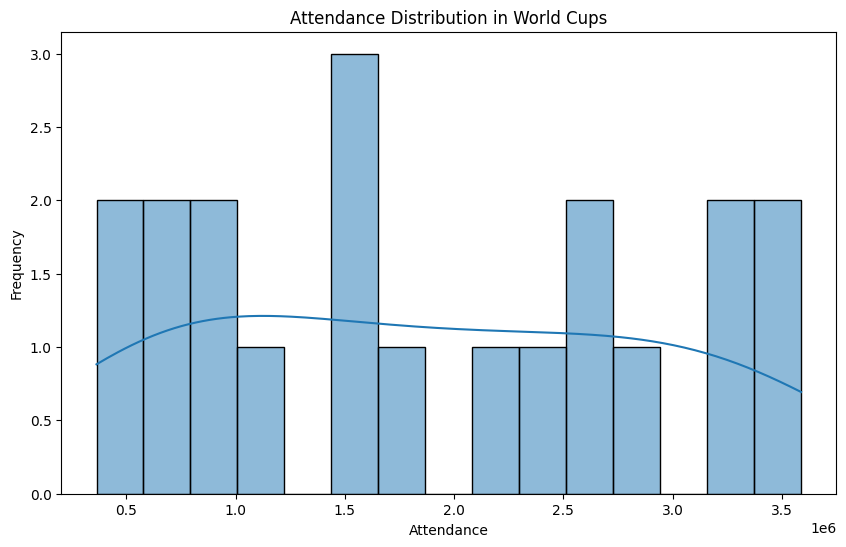

In [27]:
#With df_worldcups, show Attendance Distribution using histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_worldcups['Attendance'], bins=15, kde=True)
plt.title('Attendance Distribution in World Cups')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.show()

### Explore relationship between columns using scatter plots, bar charts

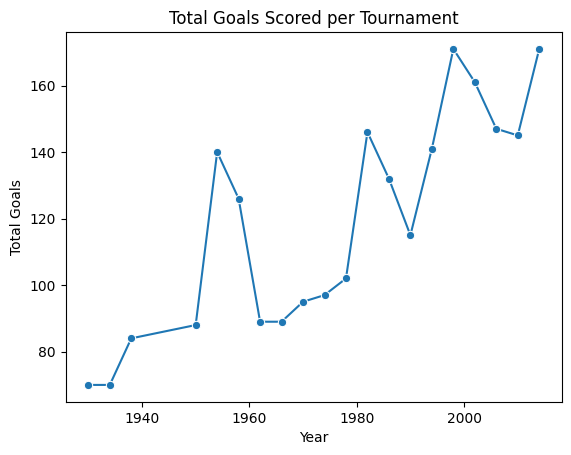

In [ ]:
#Line graph Goals by Year
sns.lineplot(data=wc, x='Year', y='GoalsScored', marker='o')
plt.title('Total Goals Scored per Tournament')
plt.ylabel('Total Goals')
plt.xlabel('Year')
plt.show()

<ipython-input-73-917610c4c454>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_goals, x='Team Type', y='Goals', palette='Set2')


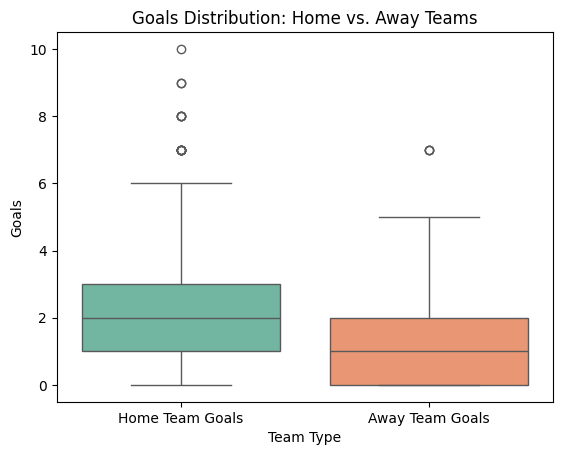

In [ ]:
#Goals Distribution Between Home and Away Teams using boxplot
df_goals = df_matches.melt(
    value_vars=['Home Team Goals', 'Away Team Goals'],
    var_name='Team Type',
    value_name='Goals'
)

sns.boxplot(data=df_goals, x='Team Type', y='Goals', palette='Set2')
plt.title('Goals Distribution: Home vs. Away Teams')
plt.xlabel('Team Type')
plt.ylabel('Goals')
plt.show()

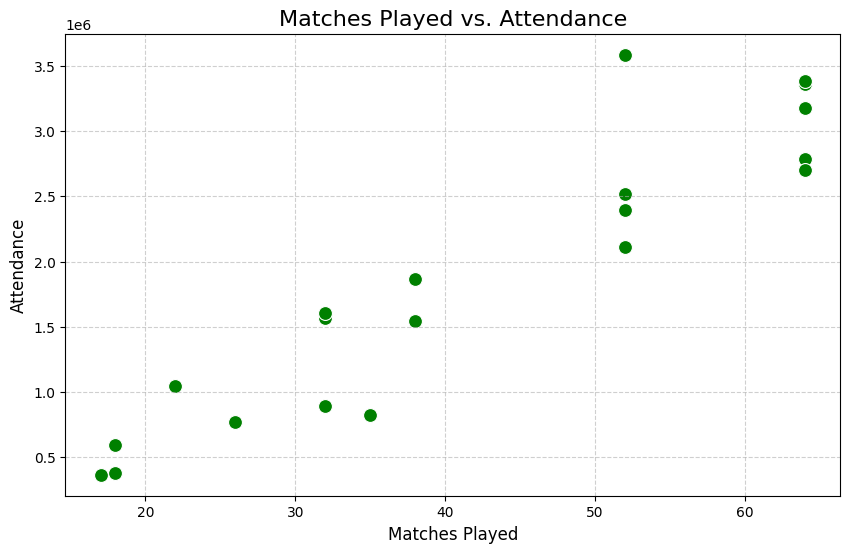

In [28]:
# Scatter Plot: Matches Played vs. Attendance, shows if tournaments with more matches played had higher attendance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MatchesPlayed', y='Attendance', data=df_worldcups, color='green', s=100)
plt.title('Matches Played vs. Attendance', fontsize=16)
plt.xlabel('Matches Played', fontsize=12)
plt.ylabel('Attendance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-30-992130df56d3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GoalsPerMatch', data=df_worldcups, palette='magma')


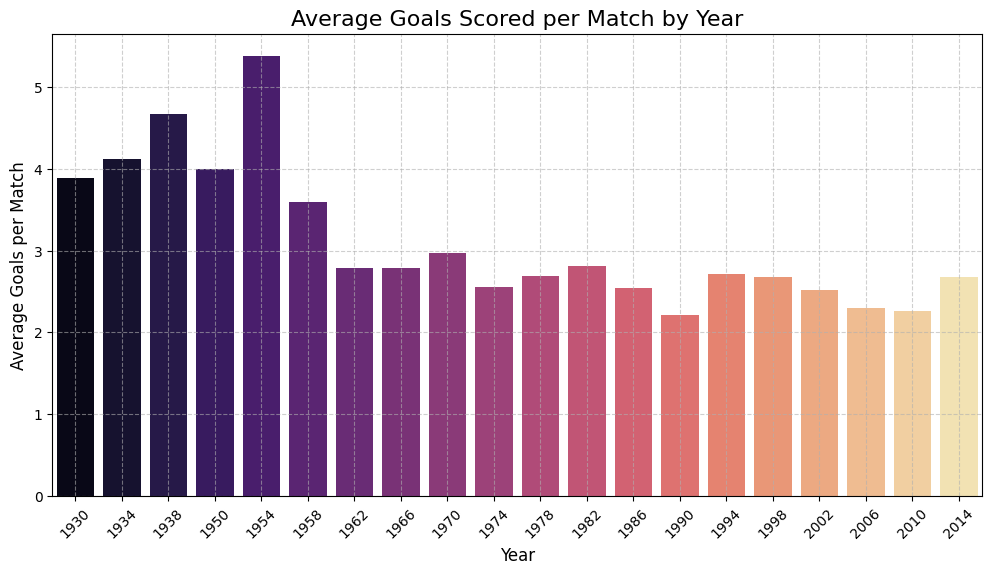

In [30]:
# Bar Chart: Average Goals Scored per Match by Year, highlight scoring trends in World Cup history
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='GoalsPerMatch', data=df_worldcups, palette='magma')
plt.title('Average Goals Scored per Match by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Goals per Match', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Make a note of interesting insights from the exploratory analysis

**Matches Played vs. Attendance (Scatter Plot)**:
*   The scatter plot shows a general upward trend, indicating that as the
number of matches played increases, total attendance also tends to rise.

**Average Goals Scored per Match by Year (Bar Chart)**:
*   The tournaments between 1930 and 1954 had higher average goals per match,
with 1954 peaking at over 5 goals per match.
*   Starting in the 1960s, the average goals per match began to decrease, stabilizing around 2–3 goals per match.



## 4. Ask & answer questions about the data

### 1. Which country has won the most World Cups?

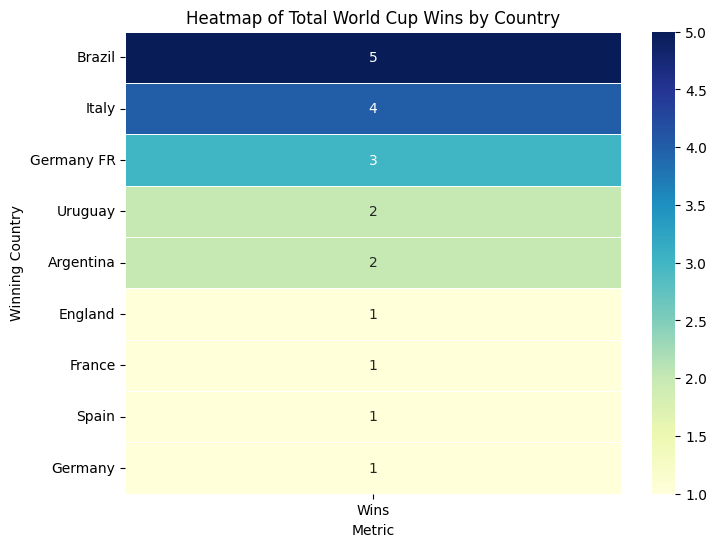

In [ ]:
#Which country has won the most World Cup
#using headmap to visulaize Winning Countries
# Count total wins by each country
winners_count = df_worldcups['Winner'].value_counts().reset_index()
winners_count.columns = ['Country', 'Wins']

# Convert to DataFrame suitable for Heatmap
winners_count_pivot = winners_count.set_index('Country')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(winners_count_pivot, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, fmt='d')

plt.title('Heatmap of Total World Cup Wins by Country')
plt.xlabel('Metric')
plt.ylabel('Winning Country')
plt.show()


### 2. What is the trend of average goals scored per match over time?

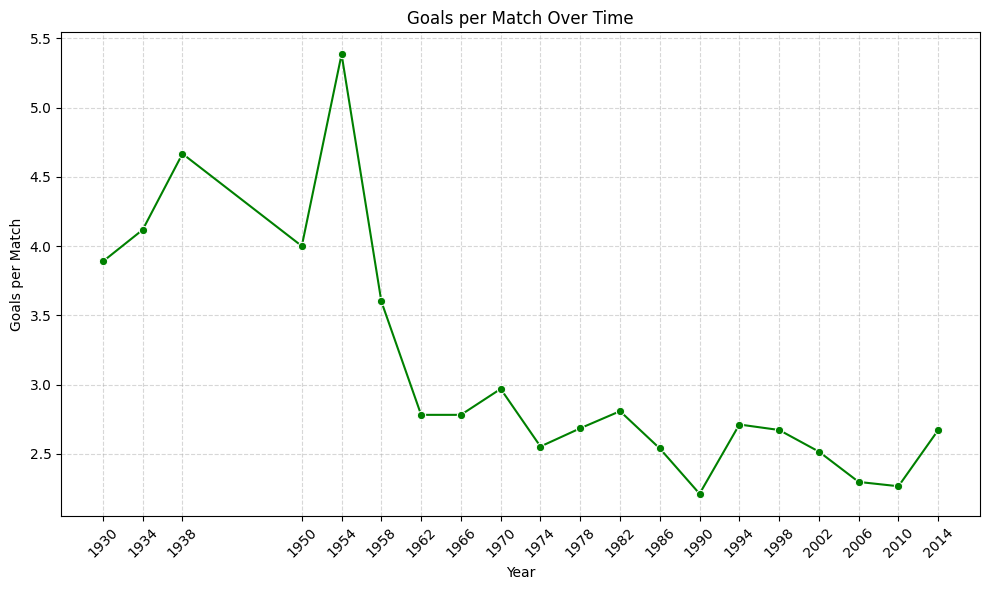

In [ ]:
#Goals per Match Over Time
# Calculate goals per match
df_worldcups['GoalsPerMatch'] = df_worldcups['GoalsScored'] / df_worldcups['MatchesPlayed']

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=wc, x='Year', y='GoalsPerMatch', marker='o', color='green')

plt.title('Goals per Match Over Time')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.xticks(df_worldcups['Year'], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Which match had the highest attendance, and which teams played?

<ipython-input-76-ebc8ebfaebcf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


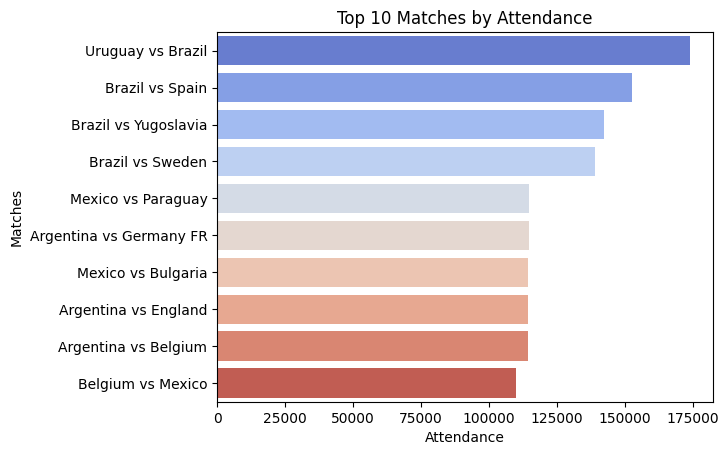

In [ ]:
#Which match had the highest attendance, and which teams played
top_attendance = df_matches.nlargest(10, 'Attendance')

sns.barplot(
    data=top_attendance,
    x='Attendance',
    y=top_attendance['Home Team Name'] + ' vs ' + top_attendance['Away Team Name'],
    palette='coolwarm'
)
plt.title('Top 10 Matches by Attendance')
plt.xlabel('Attendance')
plt.ylabel('Matches')
plt.show()

### 4. total goals scored per tournament changed over time?

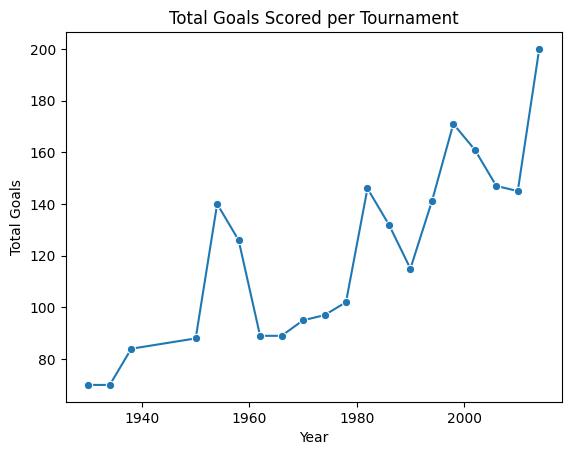

In [ ]:
#Plot: Line plot showing total goals scored in each World Cup year.
df_matches['Total Goals'] = df_matches['Home Team Goals'] + df_matches['Away Team Goals']
goals_by_year = df_matches.groupby('Year')['Total Goals'].sum().reset_index()

sns.lineplot(data=goals_by_year, x='Year', y='Total Goals', marker='o')
plt.title('Total Goals Scored per Tournament')
plt.ylabel('Total Goals')
plt.xlabel('Year')
plt.show()

### 5. Which teams have participated the most in World Cup matches?

<ipython-input-78-56182e1d18a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_counts.values, y=total_counts.index, palette='viridis')


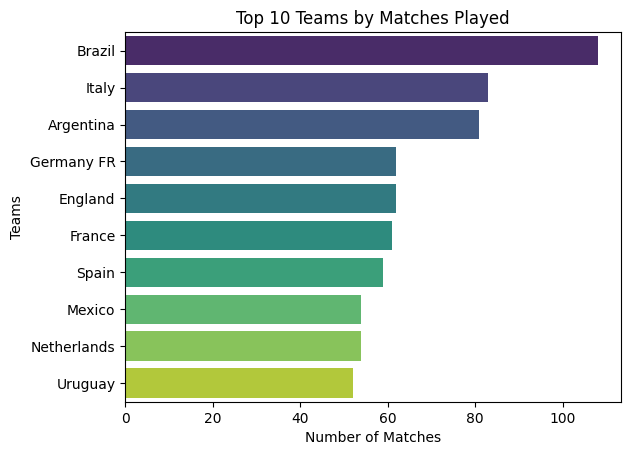

In [ ]:
#Which teams have participated the most in World Cup matches
home_counts = df_matches['Home Team Name'].value_counts()
away_counts = df_matches['Away Team Name'].value_counts()
total_counts = home_counts.add(away_counts, fill_value=0).sort_values(ascending=False).head(10)

sns.barplot(x=total_counts.values, y=total_counts.index, palette='viridis')
plt.title('Top 10 Teams by Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Teams')
plt.show()

### 6. How do goals per match vary over time, and how does it correlate with the number of players?

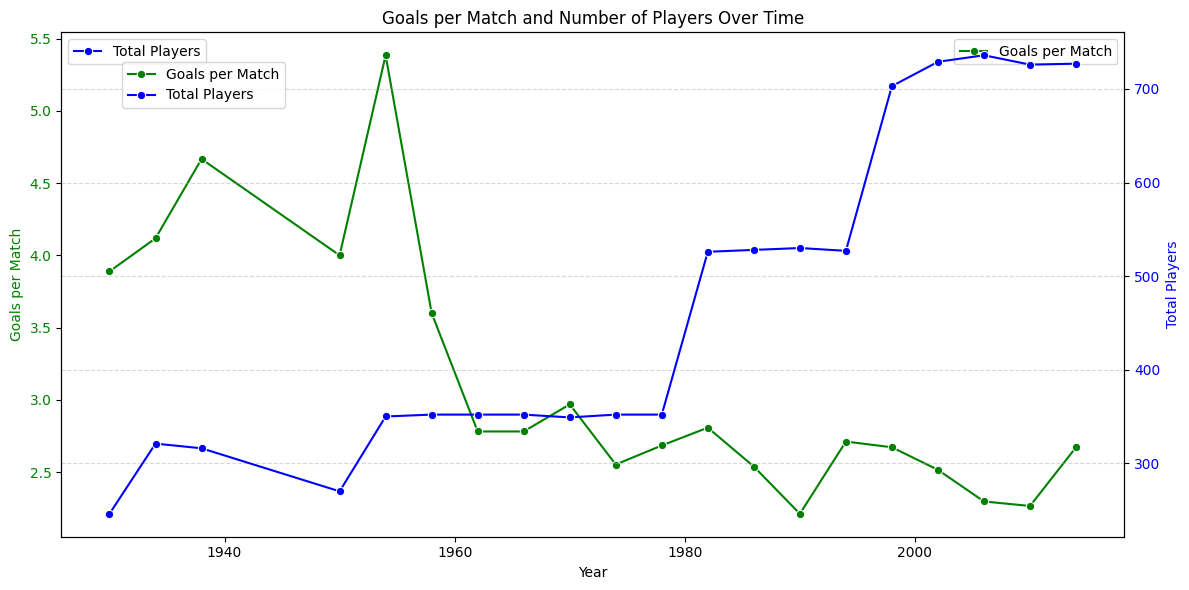

In [ ]:
# Merge Players and Matches datasets on MatchID
players_with_year = df_players.merge(df_matches[['MatchID', 'Year']], on='MatchID')

# Calculate total players per year
players_per_year = players_with_year.groupby('Year')['Player Name'].nunique().reset_index()
players_per_year.columns = ['Year', 'Total Players']

# Calculate Goals per Match
df_worldcups['GoalsPerMatch'] = df_worldcups['GoalsScored'] / df_worldcups['MatchesPlayed']

# Merge datasets on Year
df_merged = df_worldcups[['Year', 'GoalsPerMatch']].merge(players_per_year, on='Year')

# Plot dual-axis line plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Goals per Match
sns.lineplot(data=df_merged, x='Year', y='GoalsPerMatch', ax=ax1, color='green', marker='o', label='Goals per Match')
ax1.set_ylabel('Goals per Match', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Year')
ax1.set_title('Goals per Match and Number of Players Over Time')

# Plot Total Players
ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x='Year', y='Total Players', ax=ax2, color='blue', marker='o', label='Total Players')
ax2.set_ylabel('Total Players', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5. Summarize your inferences & write a conclusion

### Conclusion

### Findings & Insights